# AFL Tables - Data Analysis with Python

from http://afltables.com/afl/afl_index.html

## Step 1: Import data

In [37]:
# imports

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
# read in data file

df=pd.read_table('afltables_richmond',)

In [39]:
# view data

df.head(3)

,Cap,#,Player,DOB,HT,WT,Games (W-D-L),Goals,Seasons,Debut,Last
0,677,29,"Bartlett, Kevin",1947-03-06,177cm,71kg,403 (260-4-139),778,1965-1983,18y 56d,36y 174d
1,325,17,"Dyer, Jack",1913-11-15,185cm,89kg,312 (206-4-102),443,1931-1949,17y 175d,35y 285d
2,692,30,"Bourke, Francis",1947-04-02,185cm,84kg,300 (202-3-95),71,1967-1981,20y 41d,34y 86d


## Step 2: Data cleaning, reformatting, adding columns

In [40]:
# change column names and clean formatting

df.columns=['Cap', 'Jersey No.', 'Player', 'DOB', 'Height(cm)', 'Weight(kg)', 'Games (W-D-L)','Goals', 'Seasons', 'Debut', 'Last']

In [41]:
# set the index as Cap

df=df.set_index('Cap')

In [42]:
# remove cm from heights and kg from weights

df['Height(cm)']=df['Height(cm)'].apply(lambda x:x.split('c')[0])
df['Weight(kg)']=df['Weight(kg)'].apply(lambda x:x.split('k')[0])

In [43]:
# change height, weight, goals, jersey columns from strings to integers

df['Height(cm)']=pd.to_numeric(df['Height(cm)'],errors='coerce')
df['Weight(kg)']=pd.to_numeric(df['Weight(kg)'],errors='coerce')
df['Goals']=pd.to_numeric(df['Goals'],errors='coerce')
df['Jersey No.']=pd.to_numeric(df['Jersey No.'],errors='coerce')

In [44]:
# convert DOB to timeStamp, and check output

df['DOB']=pd.to_datetime(df['DOB'])
type(df['DOB'].iloc[0])

pandas.tslib.Timestamp

In [45]:
# split Games (W-D-L) into separate columns
# not finished, need to remove brackets and make won and lost numeric

df['Games(total)']=pd.to_numeric(df['Games (W-D-L)'].apply(lambda x:re.split(' |-',x)[0]))
df['Games(won)']=df['Games (W-D-L)'].apply(lambda x:re.split(' |-',x)[1])
df['Games(drawn)']=pd.to_numeric(df['Games (W-D-L)'].apply(lambda x:re.split(' |-',x)[2]))
df['Games(lost)']=df['Games (W-D-L)'].apply(lambda x:re.split(' |-',x)[3])

In [46]:
# create columns first season and last season

df['First Season']=df['Seasons'].apply(lambda x:x.split('-')[0])
df['Last Season']=df['Seasons'].apply(lambda x:x.split('-')[-1]) 

df['First Season']=pd.to_numeric(df['First Season'],errors='coerce')
df['Last Season']=pd.to_numeric(df['Last Season'],errors='coerce')

In [47]:
# add DOB year column

df['DOByear']=df['DOB'].apply(lambda x: x.year)

In [48]:
# create column number of seasons

df['No. of Seasons']=df['Last Season']-df['First Season']+1

In [49]:
# create column ave games per season

df['Ave Games/Season']=df['Games(total)']/df['No. of Seasons']

In [50]:
# drop columns

df.drop('Games (W-D-L)',axis=1,inplace=True)
df.drop('Seasons',axis=1,inplace=True)

**Output**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 677 to 1145
Data columns (total 17 columns):
Jersey No.          1073 non-null float64
Player              1149 non-null object
DOB                 1149 non-null datetime64[ns]
Height(cm)          1115 non-null float64
Weight(kg)          1043 non-null float64
Goals               833 non-null float64
Debut               1149 non-null object
Last                1149 non-null object
Games(total)        1149 non-null int64
Games(won)          1149 non-null object
Games(drawn)        1149 non-null int64
Games(lost)         1149 non-null object
First Season        1099 non-null float64
Last Season         1091 non-null float64
DOByear             1149 non-null int64
No. of Seasons      1068 non-null float64
Ave Games/Season    1068 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(3), object(5)
memory usage: 161.6+ KB


In [52]:
df.head(3)

,Jersey No.,Player,DOB,Height(cm),Weight(kg),Goals,Debut,Last,Games(total),Games(won),Games(drawn),Games(lost),First Season,Last Season,DOByear,No. of Seasons,Ave Games/Season
Cap,,,,,,,,,,,,,,,,,
677,29.0,"Bartlett, Kevin",1947-03-06,177.0,71.0,778.0,18y 56d,36y 174d,403,(260,4,139),1965.0,1983.0,1947,19.0,21.210526
325,17.0,"Dyer, Jack",1913-11-15,185.0,89.0,443.0,17y 175d,35y 285d,312,(206,4,102),1931.0,1949.0,1913,19.0,16.421053
692,30.0,"Bourke, Francis",1947-04-02,185.0,84.0,71.0,20y 41d,34y 86d,300,(202,3,95),1967.0,1981.0,1947,15.0,20.000000


## Step 3: Insights

### Who are the 'stockiest' and 'skinniest' players and when did they play?

In [53]:
# create BMI column

df['BMI']=df['Weight(kg)']/((df['Height(cm)']/100)**2)

**'stockiest' players**

In [54]:
df[['Player','First Season','Height(cm)','Weight(kg)','BMI']].sort_values('BMI',ascending=False).head(5)

,Player,First Season,Height(cm),Weight(kg),BMI
Cap,,,,,
340,"Guinane, Danny",1934.0,179.0,100.0,31.210012
166,"Fehring, Charlie",1917.0,188.0,108.0,30.556813
101,"Ellingsen, Percy",1912.0,168.0,86.0,30.470522
229,"Ross, George",1923.0,170.0,86.0,29.757785
552,"Gorwell, John",1955.0,160.0,76.0,29.687500


**'skinniest' players**

In [55]:
df[['Player','First Season','Height(cm)','Weight(kg)','BMI']].sort_values('BMI',ascending=True).head(5)

,Player,First Season,Height(cm),Weight(kg),BMI
Cap,,,,,
216,"Birtles, Arthur",1922.0,178.0,62.0,19.568236
1135,"Menadue, Connor",2015.0,187.0,69.0,19.731762
639,"Behan, Lance",1962.0,193.0,74.0,19.866305
1145,"Chol, Mabior",2016.0,198.0,78.0,19.895929
10,"Luff, Bill",1908.0,191.0,73.0,20.010416


### Are players getting taller and heavier?

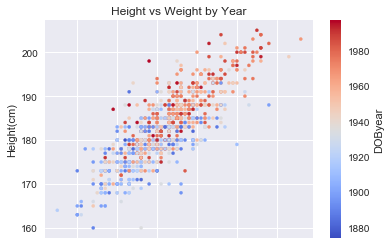

In [56]:
# plot height vs weight coloured by date of birth

df.plot.scatter(x='Weight(kg)',y='Height(cm)',c='DOByear',cmap='coolwarm',s=10,title='Height vs Weight by Year')

### What is the most worn jersey number?


**by number of players**

In [57]:
df['Jersey No.'].value_counts().head(5)

28.0    37
26.0    36
27.0    34
6.0     33
23.0    32
Name: Jersey No., dtype: int64

**by games played**

In [58]:
df.groupby('Jersey No.').sum()[['Games(total)']].sort_values('Games(total)',ascending=False).head(5)

,Games(total)
Jersey No.,
4.0,1641
1.0,1636
3.0,1561
2.0,1544
9.0,1522


### Players with most ave games per season?

In [59]:
df[['Player','Games(total)','Ave Games/Season']].sort_values('Ave Games/Season',ascending=False).head(5)

,Player,Games(total),Ave Games/Season
Cap,,,
865,"McKenna, Michael",22,22.000000
854,"Annear, John",65,21.666667
742,"Sproule, Paul",86,21.500000
677,"Bartlett, Kevin",403,21.210526
966,"Broderick, Paul",169,21.125000


### Most ave goals per game?

In [60]:
df['Ave Goals per Game']=df['Goals']/df['Games(total)']
df[['Player','Games(total)','Ave Goals per Game']].sort_values('Ave Goals per Game',ascending=False).head(5)

,Player,Games(total),Ave Goals per Game
Cap,,,
219,"Lynch, Dave",20,3.850000
445,"Murray, Sel",13,3.846154
824,"Taylor, Brian",43,3.627907
729,"Greenslade, Malcolm",2,3.500000
286,"Titus, Jack",294,3.299320


### How many games do players play?

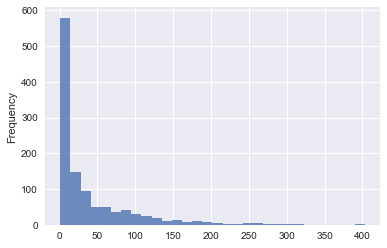

In [61]:
df['Games(total)'].plot.hist(alpha=0.8,bins=30)

**Proportion of players that play various amounts of games**

In [62]:
df[['Player','Games(total)']].groupby('Games(total)').count()

,Player
Games(total),
1,96
2,96
3,62
4,58
5,43
6,42
7,36
8,26
9,21


## Further ideas

In [63]:
# combine all teams data into one table, will need to add another column 'team'
# set up webscraping to scrape this date from page, so that it is live

# of the active players (season to == current year)), which are; oldest, youngest, best win/loss ratios, most games, most goals, heaviest, lightest, tallest, shortest
# youngest player
# oldest player
# average age for each season, are players getting younger or older?
# debuts per season
# retirements per season
# seasons when the most games retired
# of the players that debut in (current year), who has played the most games, kicked the most goals?
# average age each year
# active players per season
# best win/loss ratios
# worst win/loss ratios
# what % of players make it past 10,50,100 games? create bins
# which seasons appear to be the most successful? based on active players and their win/loss ratios
# estimate goals/game for each season
# are players playing for longer than they used to? 
# error checking and rectifying. isnull()
# convert floats to ints
# change debut age and last game age to float